In [402]:
import numpy as np
import pandas as pd
import pylab as pl
import ast
import random
import matplotlib.pyplot as plt
%matplotlib inline

### IMPORTING DATASET

In [403]:
netflix= pd.read_csv("ntitles.csv")
amazon= pd.read_csv("atitles.csv")
hbo=pd.read_csv("htitles.csv")
ncrd = pd.read_csv("ncrd.csv")
acrd = pd.read_csv("acrd.csv")
hcrd = pd.read_csv("hcrd.csv")

In [463]:
netflix

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,tm1000037,Je suis Karl,MOVIE,After most of her family is murdered in a terr...,2021,R,126,"['drama', 'thriller', 'european', 'romance']","['CZ', 'DE']",NaN,tt9205538,5.4,1077.0,12.981,5.500,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ..."
1,tm1000147,Zone 414,MOVIE,In the near future on a colony of state-of-the...,2021,R,98,"['scifi', 'thriller']",['GB'],NaN,tt8545482,4.9,4146.0,121.562,5.400,"Guy Pearce, Matilda Anna Ingrid Lutz, Travis F..."
2,tm100015,Takers,MOVIE,"A seasoned team of bank robbers, including Gor...",2010,PG-13,107,"['action', 'crime', 'drama', 'thriller']",['US'],NaN,tt1135084,6.2,62464.0,15.872,6.228,"Idris Elba, Paul Walker, Matt Dillon, Michael ..."
3,tm1000166,Wave of Cinema: Surat Dari Timur,MOVIE,Featuring a mix of film footage and special pe...,2020,NaN,57,['music'],['ID'],NaN,NaN,NaN,NaN,0.660,NaN,"Glenn Fredly, Marcello Tahitoe, Andien Aisyah,..."
4,tm1000185,Squared Love,MOVIE,A celebrity journalist and renowned womanizer ...,2021,NaN,102,"['comedy', 'romance']",['PL'],NaN,tt13846542,5.1,3158.0,14.920,6.100,"Adrianna Chlebicka, Mateusz Banasiuk, Mirosław..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,ts98316,Edge of the Universe,SHOW,Leading astronomers reveal the latest discover...,2002,TV-G,49,['documentation'],['GB'],1.0,tt6951568,7.2,208.0,1.139,NaN,John Hurt
5846,ts98340,Metallica: Some Kind of Monster,SHOW,This collection includes the acclaimed rock do...,2004,TV-MA,84,['western'],"['CA', 'US']",1.0,tt6954486,NaN,NaN,0.893,NaN,NaN
5847,ts98353,DreamWorks Spooky Stories,SHOW,A collection of animated tales includes shrek'...,2009,TV-PG,26,['animation'],['US'],1.0,tt6958564,6.2,19.0,0.880,NaN,NaN
5848,ts987,Danger Mouse,SHOW,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,14,"['animation', 'comedy', 'family', 'scifi', 'eu...",['GB'],10.0,tt0081848,7.4,3545.0,8.550,7.500,"David Jason, Terry Scott, Edward Kelsey, Brian..."


In [462]:
ncrd

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
77796,736339,tm1059008,Adelaida Buscato,María Paz,ACTOR
77797,399499,tm1059008,Luz Stella Luengas,Karen Bayona,ACTOR
77798,373198,tm1059008,Inés Prieto,Fanny,ACTOR
77799,378132,tm1059008,Isabel Gaona,Cacica,ACTOR


#### DATA CLEANING

In [404]:
actors_df = ncrd.groupby('id')['name'].apply(lambda x: ', '.join(x)).reset_index()
netflix = pd.merge_ordered(netflix,actors_df,on='id',how='outer')
"""------------------------------------------------------------------"""
actors_df = acrd.groupby('id')['name'].apply(lambda x: ', '.join(x)).reset_index()
amazon = pd.merge_ordered(amazon,actors_df,on='id',how='outer')
"""------------------------------------------------------------------"""
actors_df = hcrd.groupby('id')['name'].apply(lambda x: ', '.join(x)).reset_index()
hbo = pd.merge_ordered(hbo,actors_df,on='id',how='outer')


df = pd.concat([netflix, amazon, hbo], axis=0)
df = df.drop_duplicates()

In [405]:
df = df.drop_duplicates()
df = pd.DataFrame(df)

In [406]:
#df_old=df

Text(0.5, 1.0, 'Distribution of Missing Values')

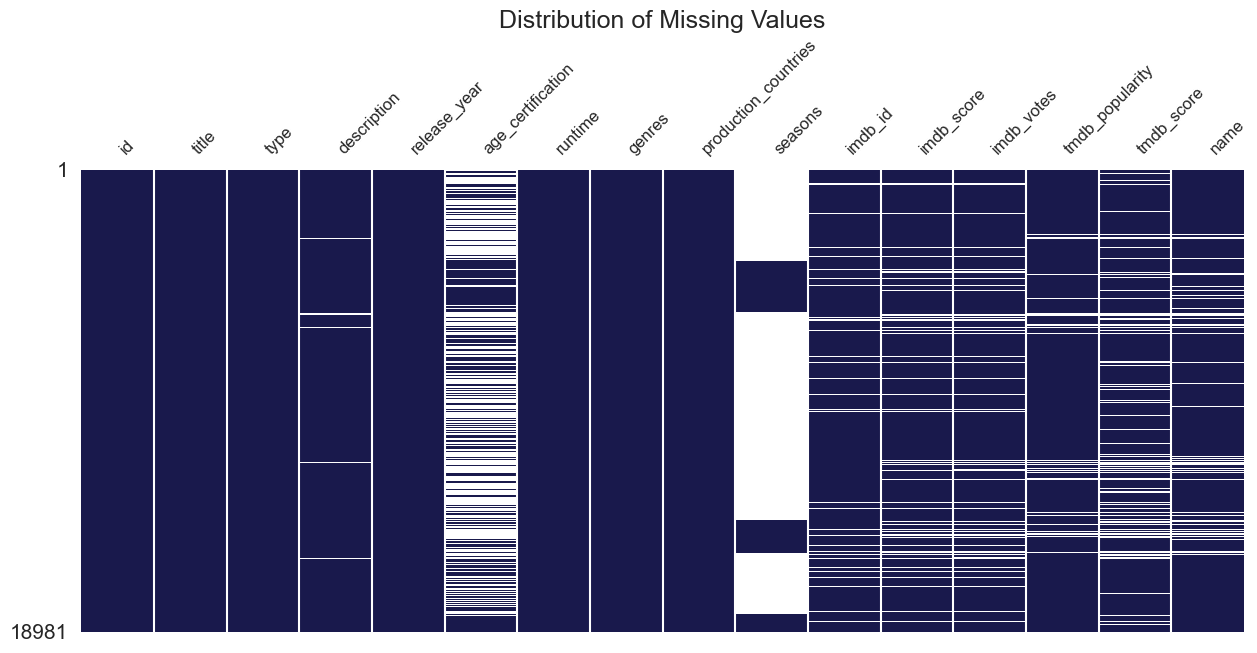

In [407]:
#### no need of this visualization
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno
msno.matrix(df, figsize=(15,6), fontsize=12, sparkline=False, color=(0.1, 0.1, 0.3))
plt.title('Distribution of Missing Values', fontsize=18)

From the above graph, we can say that seasons and age_certification columns  are having of lot of null values.

In [408]:
df.drop('age_certification', axis = 1, inplace=True)
df.drop('seasons', axis = 1, inplace=True)
df.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,tm1000037,Je suis Karl,MOVIE,After most of her family is murdered in a terr...,2021,126,"['drama', 'thriller', 'european', 'romance']","['CZ', 'DE']",tt9205538,5.4,1077.0,12.981,5.500,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ..."
1,tm1000147,Zone 414,MOVIE,In the near future on a colony of state-of-the...,2021,98,"['scifi', 'thriller']",['GB'],tt8545482,4.9,4146.0,121.562,5.400,"Guy Pearce, Matilda Anna Ingrid Lutz, Travis F..."
2,tm100015,Takers,MOVIE,"A seasoned team of bank robbers, including Gor...",2010,107,"['action', 'crime', 'drama', 'thriller']",['US'],tt1135084,6.2,62464.0,15.872,6.228,"Idris Elba, Paul Walker, Matt Dillon, Michael ..."
3,tm1000166,Wave of Cinema: Surat Dari Timur,MOVIE,Featuring a mix of film footage and special pe...,2020,57,['music'],['ID'],NaN,NaN,NaN,0.660,NaN,"Glenn Fredly, Marcello Tahitoe, Andien Aisyah,..."
4,tm1000185,Squared Love,MOVIE,A celebrity journalist and renowned womanizer ...,2021,102,"['comedy', 'romance']",['PL'],tt13846542,5.1,3158.0,14.920,6.100,"Adrianna Chlebicka, Mateusz Banasiuk, Mirosław..."


In [409]:
df['genres'] = df['genres'].astype(str)
df['genres'] = df['genres'].map(lambda x: x.replace("[", "").replace("]", ""))
df['genres'] = df['genres'].map(lambda x: x.replace("'", "").replace(",",""))
df.genres = df.genres.replace('', np.nan)

In [410]:
df.dropna(inplace=True)
df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
name                    0
dtype: int64

In [411]:
df.shape

(14756, 14)

In [412]:
def rake_extractor(text):
    from rake_nltk import Rake
    r = Rake()
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()[:5]

In [413]:
df['keywords'] = df['description'].map(lambda x: rake_extractor(x))
df['keywords'] = df['keywords'].astype(str)
df['keywords'] = df['keywords'].map(lambda x: x.replace("]", "").replace("[",""))
df['keywords'] = df['keywords'].map(lambda x: x.replace(",", " ").replace("'", " "))
#df.set_index('serial Number', inplace=True)
df.head(5)
#df.set_index('index',inplace= True)
df.reset_index(inplace=True)
df['index_no'] = df.index
df_meta = df.copy()

cos_df_meta = df_meta.copy()

In [414]:
df_meta.head()

,index,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,keywords,index_no
0,0,tm1000037,Je suis Karl,MOVIE,After most of her family is murdered in a terr...,2021,126,drama thriller european romance,"['CZ', 'DE']",tt9205538,5.4,1077.0,12.981,5.500,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",young woman unknowingly lured terrorist...,0
1,1,tm1000147,Zone 414,MOVIE,In the near future on a colony of state-of-the...,2021,98,scifi thriller,['GB'],tt8545482,4.9,4146.0,121.562,5.400,"Guy Pearce, Matilda Anna Ingrid Lutz, Travis F...",missing daughter home private investigator...,1
2,2,tm100015,Takers,MOVIE,"A seasoned team of bank robbers, including Gor...",2010,107,action crime drama thriller,['US'],tt1135084,6.2,62464.0,15.872,6.228,"Idris Elba, Paul Walker, Matt Dillon, Michael ...",reckless police officer inches closer jess...,2
3,4,tm1000185,Squared Love,MOVIE,A celebrity journalist and renowned womanizer ...,2021,102,comedy romance,['PL'],tt13846542,5.1,3158.0,14.920,6.100,"Adrianna Chlebicka, Mateusz Banasiuk, Mirosław...",renowned womanizer starts mysterious model...,3
4,5,tm100027,Alibaba Aur 40 Chor,MOVIE,The movie is based on the story of Ali Baba an...,1979,146,drama romance action fantasy family,"['SU', 'IN']",tt0079749,6.2,565.0,2.582,6.800,"Dharmendra, Hema Malini, Zeenat Aman, Prem Cho...",hema malini play morjina one thousand o...,4


In [415]:
df_movies = df

In [416]:
df_movies.shape

(14756, 17)

In [417]:
df_movies['lead_country']=df_movies['production_countries'].str.split(',').str[0]
## df['split_name'] = df['company'].str.split(' ')

In [418]:
df_movies.head()

,index,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,keywords,index_no,lead_country
0,0,tm1000037,Je suis Karl,MOVIE,After most of her family is murdered in a terr...,2021,126,drama thriller european romance,"['CZ', 'DE']",tt9205538,5.4,1077.0,12.981,5.500,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",young woman unknowingly lured terrorist...,0,['CZ'
1,1,tm1000147,Zone 414,MOVIE,In the near future on a colony of state-of-the...,2021,98,scifi thriller,['GB'],tt8545482,4.9,4146.0,121.562,5.400,"Guy Pearce, Matilda Anna Ingrid Lutz, Travis F...",missing daughter home private investigator...,1,['GB']
2,2,tm100015,Takers,MOVIE,"A seasoned team of bank robbers, including Gor...",2010,107,action crime drama thriller,['US'],tt1135084,6.2,62464.0,15.872,6.228,"Idris Elba, Paul Walker, Matt Dillon, Michael ...",reckless police officer inches closer jess...,2,['US']
3,4,tm1000185,Squared Love,MOVIE,A celebrity journalist and renowned womanizer ...,2021,102,comedy romance,['PL'],tt13846542,5.1,3158.0,14.920,6.100,"Adrianna Chlebicka, Mateusz Banasiuk, Mirosław...",renowned womanizer starts mysterious model...,3,['PL']
4,5,tm100027,Alibaba Aur 40 Chor,MOVIE,The movie is based on the story of Ali Baba an...,1979,146,drama romance action fantasy family,"['SU', 'IN']",tt0079749,6.2,565.0,2.582,6.800,"Dharmendra, Hema Malini, Zeenat Aman, Prem Cho...",hema malini play morjina one thousand o...,4,['SU'


Feature Engineering

In [419]:
df_movies.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
name                    0
keywords                0
index_no                0
lead_country            0
dtype: int64

In [420]:
df_movies.set_index('title', inplace=True)
df_movies.head()

,index,id,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,keywords,index_no,lead_country
title,,,,,,,,,,,,,,,,,
Je suis Karl,0,tm1000037,MOVIE,After most of her family is murdered in a terr...,2021,126,drama thriller european romance,"['CZ', 'DE']",tt9205538,5.4,1077.0,12.981,5.500,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",young woman unknowingly lured terrorist...,0,['CZ'
Zone 414,1,tm1000147,MOVIE,In the near future on a colony of state-of-the...,2021,98,scifi thriller,['GB'],tt8545482,4.9,4146.0,121.562,5.400,"Guy Pearce, Matilda Anna Ingrid Lutz, Travis F...",missing daughter home private investigator...,1,['GB']
Takers,2,tm100015,MOVIE,"A seasoned team of bank robbers, including Gor...",2010,107,action crime drama thriller,['US'],tt1135084,6.2,62464.0,15.872,6.228,"Idris Elba, Paul Walker, Matt Dillon, Michael ...",reckless police officer inches closer jess...,2,['US']
Squared Love,4,tm1000185,MOVIE,A celebrity journalist and renowned womanizer ...,2021,102,comedy romance,['PL'],tt13846542,5.1,3158.0,14.920,6.100,"Adrianna Chlebicka, Mateusz Banasiuk, Mirosław...",renowned womanizer starts mysterious model...,3,['PL']
Alibaba Aur 40 Chor,5,tm100027,MOVIE,The movie is based on the story of Ali Baba an...,1979,146,drama romance action fantasy family,"['SU', 'IN']",tt0079749,6.2,565.0,2.582,6.800,"Dharmendra, Hema Malini, Zeenat Aman, Prem Cho...",hema malini play morjina one thousand o...,4,['SU'


In [421]:
df_movies.columns

Index(['index', 'id', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'name', 'keywords', 'index_no',
       'lead_country'],
      dtype='object')

In [422]:
df_movies.drop(['id', 'imdb_id', 'keywords','index','name','index_no',], axis=1, inplace=True)

In [423]:
df_movies.drop(['description'], axis=1, inplace=True)

In [424]:
df_movies.head()

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,lead_country
title,,,,,,,,,,
Je suis Karl,MOVIE,2021,126,drama thriller european romance,"['CZ', 'DE']",5.4,1077.0,12.981,5.500,['CZ'
Zone 414,MOVIE,2021,98,scifi thriller,['GB'],4.9,4146.0,121.562,5.400,['GB']
Takers,MOVIE,2010,107,action crime drama thriller,['US'],6.2,62464.0,15.872,6.228,['US']
Squared Love,MOVIE,2021,102,comedy romance,['PL'],5.1,3158.0,14.920,6.100,['PL']
Alibaba Aur 40 Chor,MOVIE,1979,146,drama romance action fantasy family,"['SU', 'IN']",6.2,565.0,2.582,6.800,['SU'


In [425]:
### Data Visualization

# visualisation
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno

#### EDA

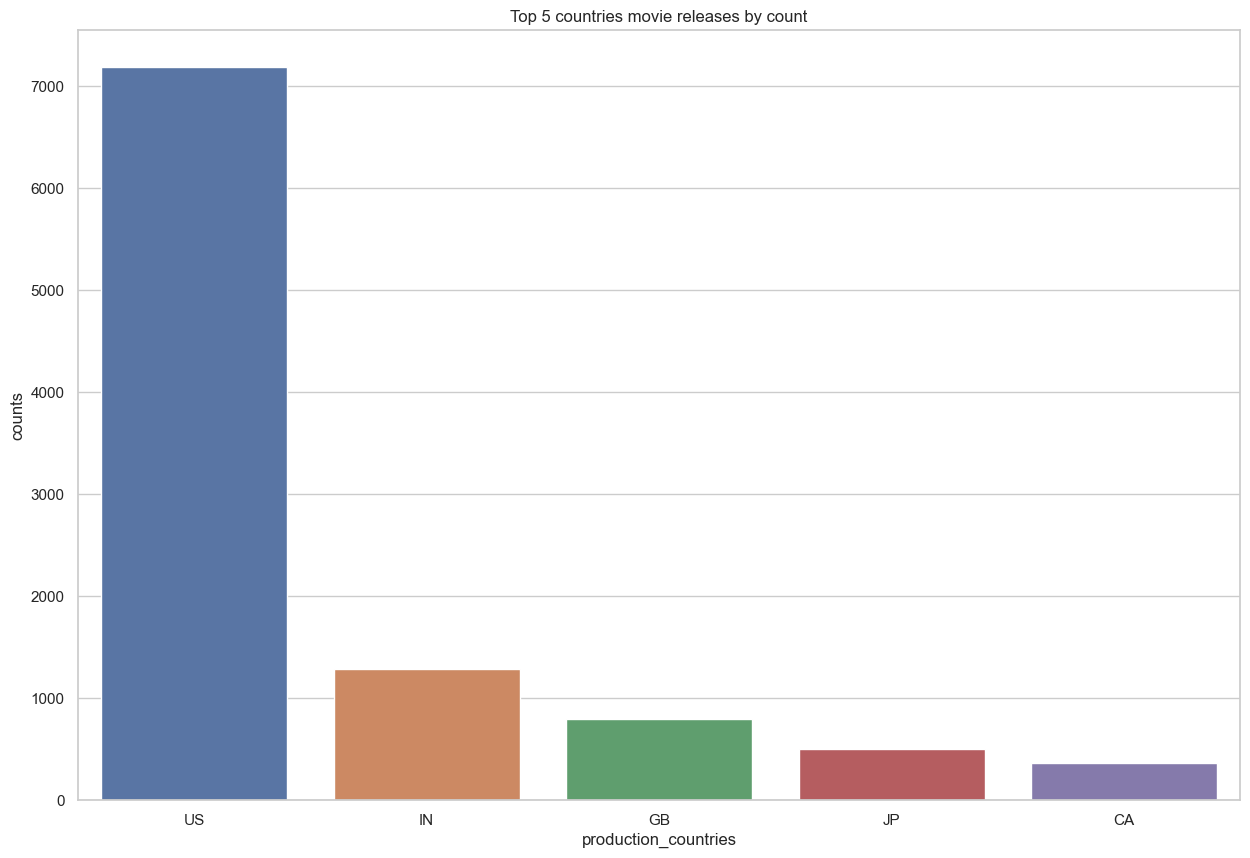

In [426]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}
    
    
    
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)


df['production_countries'] = df['production_countries'].map(lambda x: x.replace("[", "").replace("]", ""))
df['production_countries'] = df['production_countries'].map(lambda x: x.replace("'", ""))
countries = df.groupby('production_countries').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})
countries.dropna()
#df['production_countries'].astype(str)
figure_size()
plt.title("Top 5 countries movie releases by count")
sns.barplot(x = countries.production_countries[:5],y = countries.counts[:5]);
plt.show()

We are plotting the top 5 countries movie releases by count. From the graph we can say that US country released 7000+ movies and stands at top position and CA country released 250 movies (approx) and stands at 5th position.

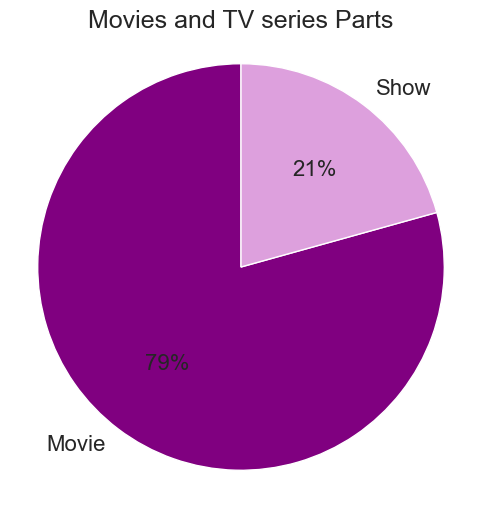

In [427]:
plt.figure(figsize=(10,6))
plt.title('Movies and TV series Parts', fontsize=18)
plt.pie(df_movies.type.value_counts(), 
        labels=['Movie', 'Show'],
        textprops={"fontsize":16},
        radius=1.1, startangle=90,
        colors=['#800080', '#DDA0DD'],
        autopct='%.0f%%')
plt.show()

From the above graph we can say thaat the entire dataset contains 79% of movies and 21% of Shows.

e:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


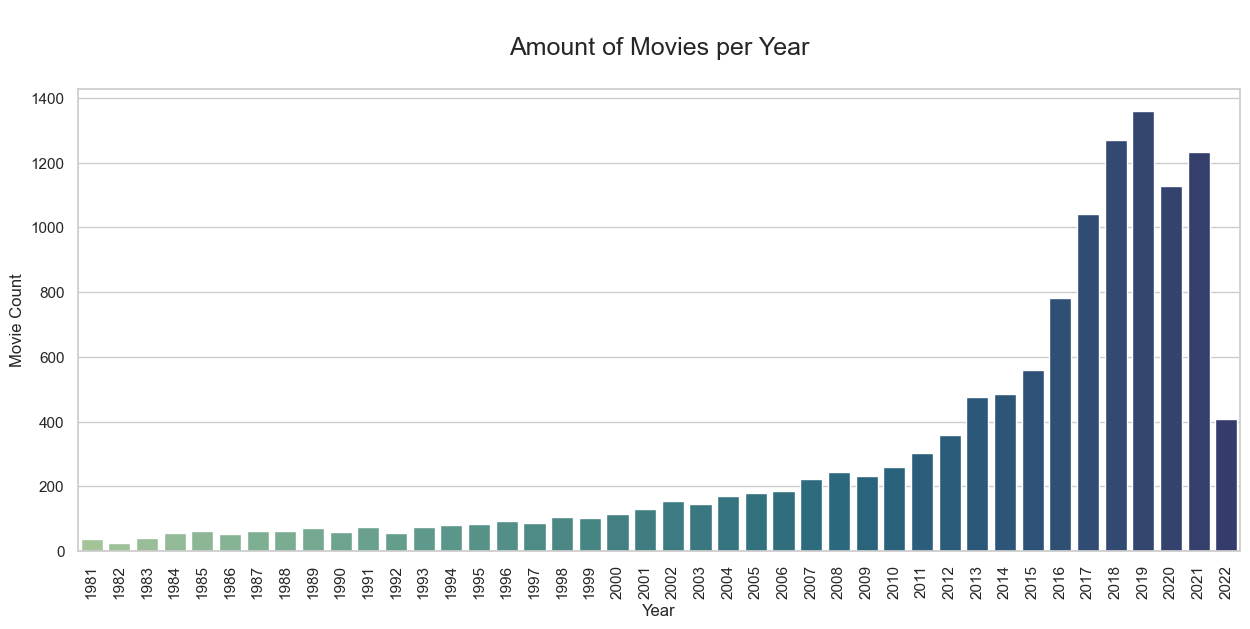

In [428]:
plt.figure(figsize=(15,6))
plt.title('\nAmount of Movies per Year\n', fontsize=18)
sns.countplot(df_movies[df_movies.release_year>1980].release_year, palette='crest')
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.show()

According to the graph above, the number of movies produced every year progressively climbed from 1981 to 2019, then decreased for 2020, increased for 2021, and decreased for 2022.

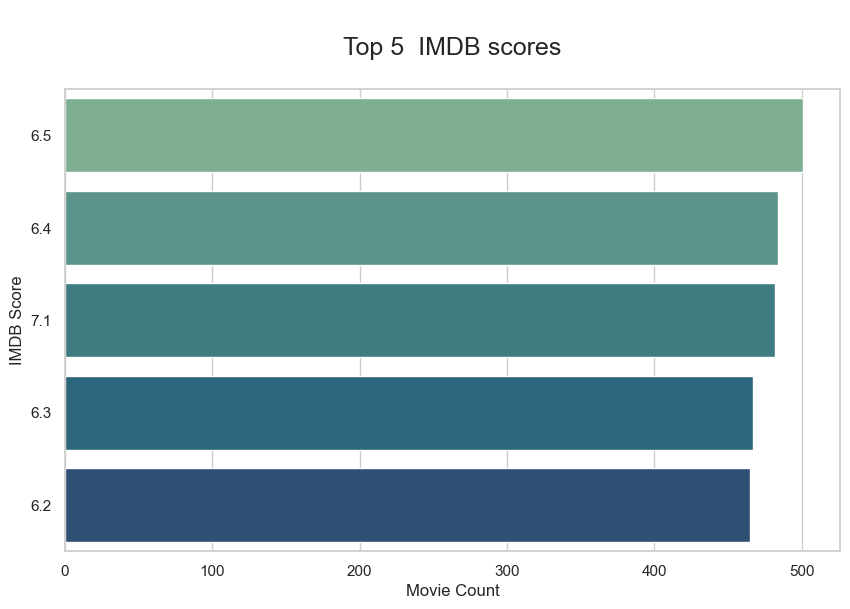

In [429]:
bp_df = pd.DataFrame(df_movies.imdb_score.value_counts()).head(5)
order = bp_df.index
plt.figure(figsize=(10,6))
plt.title('\nTop 5  IMDB scores\n', fontsize=18)
sns.countplot(y=df_movies.imdb_score, palette='crest',order=order)
plt.xlabel('Movie Count')
plt.ylabel('IMDB Score')
plt.show()

From the above graph says most of the flim are rated 6.5.

In [430]:
# Let's also add a number of countries, envolved in movie making, so that we save a little more data
df_movies['prod_countries_cnt'] = df_movies['production_countries'].str.split(',').str.len()
df_movies.lead_country = df_movies.lead_country.replace('', np.nan)
df_movies['genres'] = df_movies['genres'].replace("[", '')

df_movies['main_genre'] = df_movies['genres'].str.split(',').str[0]
df_movies.drop(['genres', 'production_countries'], axis=1, inplace=True)
df_movies.main_genre = df_movies.main_genre.replace('', np.nan)

#### KMEANS

In [431]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [432]:
#### creating dummy variables
dummies = pd.get_dummies(df_movies[['type', 'lead_country', 'main_genre']], drop_first=True)
df_movies_dum = pd.concat([df_movies, dummies], axis=1)
df_movies_dum.drop(['type', 'lead_country', 'main_genre'], axis=1, inplace=True)

In [433]:
print(df_movies_dum)

                                    release_year  runtime  imdb_score  \
title                                                                   
Je suis Karl                                2021      126         5.4   
Zone 414                                    2021       98         4.9   
Takers                                      2010      107         6.2   
Squared Love                                2021      102         5.1   
Alibaba Aur 40 Chor                         1979      146         6.2   
...                                          ...      ...         ...   
Billy on the Street                         2011       22         7.7   
Dawson's Creek                              1998       44         6.7   
The Comeback                                2005       31         8.0   
Check It Out! with Dr. Steve Brule          2010       12         8.6   
Eagleheart                                  2011       13         7.4   

                                    imdb_votes  tm

In [434]:
#### rescaling the variables
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_movies_dum)
df_scaled = pd.DataFrame(df_scaled, columns=[df_movies_dum.columns])
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,14756.0,0.845644,0.206375,0.0,0.818182,0.936364,0.972727,1.0
runtime,14756.0,0.263023,0.104823,0.0,0.189024,0.274390,0.320122,1.0
imdb_score,14756.0,0.590630,0.144203,0.0,0.500000,0.602273,0.693182,1.0
imdb_votes,14756.0,0.010238,0.041036,0.0,0.000147,0.000658,0.003696,1.0
tmdb_popularity,14756.0,0.003746,0.015616,0.0,0.000532,0.001174,0.002756,1.0
...,...,...,...,...,...,...,...,...
main_genre_western thriller,14756.0,0.000136,0.011642,0.0,0.000000,0.000000,0.000000,1.0
main_genre_western thriller horror,14756.0,0.000068,0.008232,0.0,0.000000,0.000000,0.000000,1.0
main_genre_western war,14756.0,0.000068,0.008232,0.0,0.000000,0.000000,0.000000,1.0
main_genre_western war drama history romance,14756.0,0.000068,0.008232,0.0,0.000000,0.000000,0.000000,1.0


In [435]:
df_scaled.shape

(14756, 3735)

In [436]:
print(df_movies_dum.columns)

Index(['release_year', 'runtime', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'prod_countries_cnt', 'type_SHOW',
       'lead_country_['AE']', 'lead_country_['AF'',
       ...
       'main_genre_western romance drama',
       'main_genre_western romance drama action',
       'main_genre_western scifi action comedy',
       'main_genre_western scifi crime romance',
       'main_genre_western sport action music romance',
       'main_genre_western thriller', 'main_genre_western thriller horror',
       'main_genre_western war',
       'main_genre_western war drama history romance',
       'main_genre_western war romance'],
      dtype='object', length=3735)


In [437]:
#### implementing pca
from sklearn.decomposition import PCA

pca = PCA(n_components=240, svd_solver='full')
df_scaled_full = pca.fit(df_scaled).transform(df_scaled)

explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)

e:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
e:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


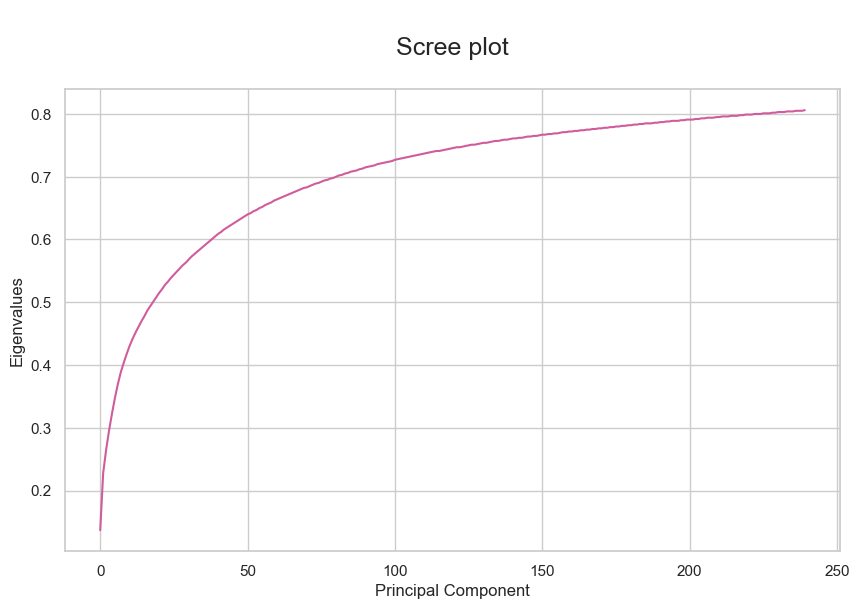

In [438]:
plt.figure(figsize=(10,6))
plt.title('\nScree plot\n', fontsize=18)
plt.plot(np.arange(240), explained_variance, color='#D05C9C')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()


In [439]:
pca_60 = PCA(n_components=60, svd_solver='full')
df_scaled_60 = pca.fit(df_scaled).transform(df_scaled)

e:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
e:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [440]:
K = range(10, 80)
models = [KMeans(n_clusters = k, random_state=8, max_iter = 10000).fit(df_scaled_60) for k in K]
dist = [model.inertia_ for model in models]

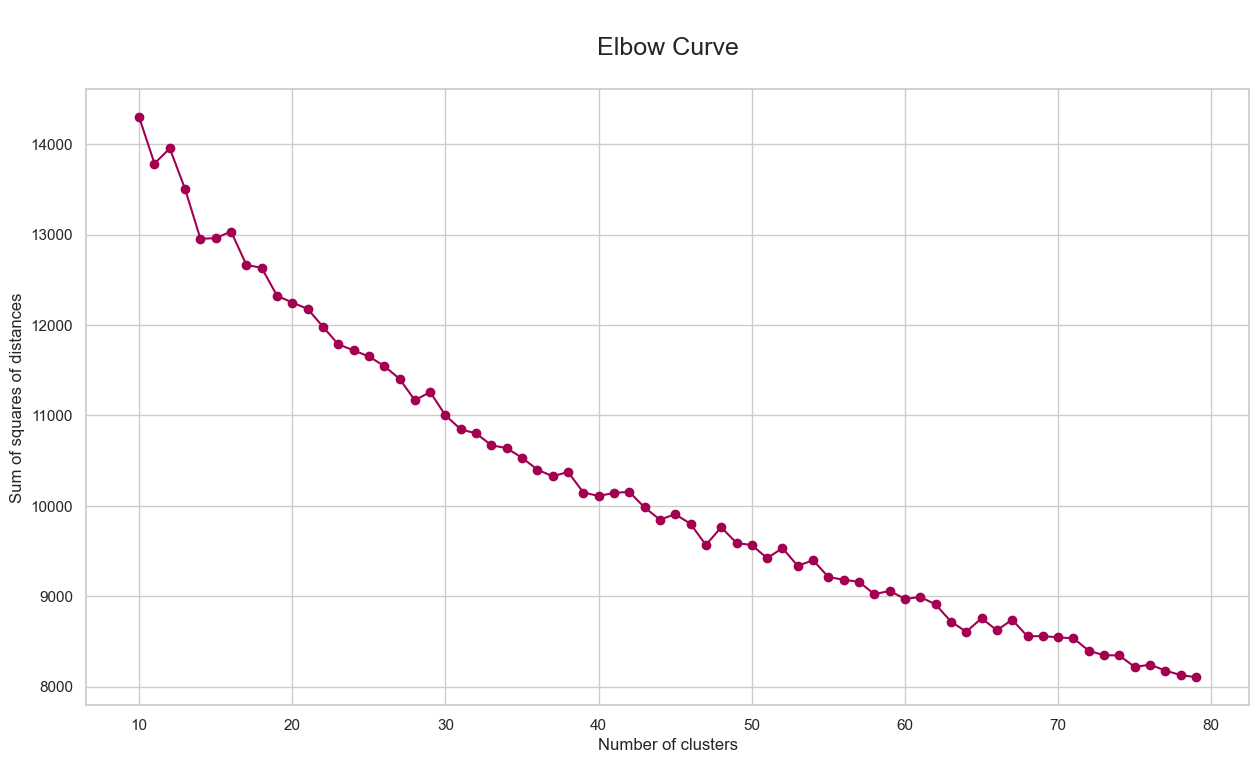

In [441]:
plt.figure(figsize=(15,8))
plt.plot(K, dist, marker='o', color='#a30052')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares of distances')
plt.title('\nElbow Curve\n', fontsize=18)
plt.show()

In [442]:
range_n_clusters = range(20, 41, 5)
for n_clusters in range_n_clusters:
    
    models1 = KMeans(n_clusters=n_clusters, random_state=8, max_iter=10000)
    model_labels = models1.fit_predict(df_scaled_60)
    
    silhouette_avg = silhouette_score(df_scaled_60, model_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

For n_clusters = 20 The average silhouette_score is : 0.2095246730716329
For n_clusters = 25 The average silhouette_score is : 0.20844750327706596
For n_clusters = 30 The average silhouette_score is : 0.23441763212060243
For n_clusters = 35 The average silhouette_score is : 0.24053470947437217
For n_clusters = 40 The average silhouette_score is : 0.25556026623613554


In [443]:
models_150 = KMeans(n_clusters=150, random_state=8, max_iter = 10000)
model_labels_150 = models_150.fit_predict(df_scaled_60)
silhouette_avg_150 = silhouette_score(df_scaled_60, model_labels_150)
print("For n_clusters =", 150, "The average silhouette_score is :", silhouette_avg_150)

For n_clusters = 150 The average silhouette_score is : 0.32972139569682984


In [444]:
models_300 = KMeans(n_clusters=300, random_state=8, max_iter = 10000)
model_labels_300 = models_300.fit_predict(df_scaled_60)
silhouette_avg_300 = silhouette_score(df_scaled_60, model_labels_300)
print("For n_clusters =", 300, "The average silhouette_score is :", silhouette_avg_300)

For n_clusters = 300 The average silhouette_score is : 0.3508239979513155


#### dbscan 10D

In [445]:
from sklearn.decomposition import PCA
pca_10d = PCA(n_components=10)
PCs_10d = pd.DataFrame(pca_10d.fit_transform(df_scaled_60))

eps_array = [0.2, 0.5, 1]
min_samples_array = [5, 10, 30]

In [446]:
for eps in eps_array:
    for min_samples in min_samples_array:
        clusterer = DBSCAN(eps=eps, min_samples=min_samples).fit(PCs_10d)
        cluster_labels = clusterer.labels_
    if len(set(cluster_labels)) == 1:
        continue
    silhouette_avg = silhouette_score(PCs_10d, cluster_labels)
    print("For eps =", eps,
          "For min_samples =", min_samples,
          "Count clusters =", len(set(cluster_labels)),
          "The average silhouette_score is :", silhouette_avg)

For eps = 0.2 For min_samples = 30 Count clusters = 26 The average silhouette_score is : 0.6531159102708772
For eps = 0.5 For min_samples = 30 Count clusters = 26 The average silhouette_score is : 0.6875211963996669


In [447]:
dbscan10d_model = DBSCAN(eps=0.2, min_samples=10).fit(PCs_10d)
print("For eps =", 0.2,
      "For min_samples =", 10,
      "Count clusters =", len(set(dbscan10d_model.labels_)),
      "The average silhouette_score is :", silhouette_score(PCs_10d, dbscan10d_model.labels_))

For eps = 0.2 For min_samples = 10 Count clusters = 38 The average silhouette_score is : 0.6632035676856283


In [448]:
df_movies['clusters'] = dbscan10d_model.labels_

In [449]:
def recommend_movie(movie_name: str):
  
  # Define cluster of the input movie
    movie_name = movie_name.lower()
    #print(movie_name)
    df_movies['name'] = df_movies.index.str.lower()
    movie = df_movies[df_movies.main_genre.str.contains(movie_name)]
    #print(movie)
    #df['clusters'] = df['clusters'].astype('int')
    #print(movie)
    cluster = movie['clusters'][0]
    print(cluster)
  
  # Get all the movies of the same cluster 
    cluster_movies = df_movies[df_movies['clusters']== cluster]
  
  # Get 5 random movies of the same cluster
    import random
    all_movies = list(cluster_movies.index)
    recommended_movies = random.sample(all_movies, 5)
    for m in recommended_movies:
        print(m)

In [450]:
recommend_movie('drama')

0
Sunstroke
Do You Know Me
Contagion
A Bomb Was Stolen
The Last Metro


#### Cosine Similarity

In [451]:
df = cos_df_meta

In [452]:
df = cos_df_meta
feature = ['genres', 'name', 'keywords']
print(feature)
for feature in feature:
  df[feature] = df[feature].fillna('')
  
combined_features = df['genres']+' '+df['name']+' '+df['keywords']

['genres', 'name', 'keywords']


In [453]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
feature_vectors[0]

<1x95904 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [454]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.0129262  0.01037667 ... 0.00550157 0.         0.        ]
 [0.0129262  1.         0.00272822 ... 0.         0.         0.        ]
 [0.01037667 0.00272822 1.         ... 0.01401793 0.01613288 0.01509152]
 ...
 [0.00550157 0.         0.01401793 ... 1.         0.00414275 0.05576848]
 [0.         0.         0.01613288 ... 0.00414275 1.         0.01195605]
 [0.         0.         0.01509152 ... 0.05576848 0.01195605 1.        ]]


In [455]:
# creating a list with all the movie names given in the dataset
list_of_all_titles = df['title'].tolist()
print(list_of_all_titles)

['Je suis Karl', 'Zone 414', 'Takers', 'Squared Love', 'Alibaba Aur 40 Chor', 'New Gods: Nezha Reborn', 'Namaste Wahala', 'The Last Forest', 'Radhe Shyam', 'Ride or Die', 'My Amnesia Girl', 'Roohi', 'Beauty', 'Biggie: I Got a Story to Tell', 'Secret Magic Control Agency', 'Man in Love', 'Biking Borders - eine etwas andere Reise', 'Nightbooks', 'Fate: The Winx Saga - The Afterparty', 'The Witcher: Nightmare of the Wolf', 'Nate Bargatze: The Greatest Average American', 'Operation Varsity Blues: The College Admissions Scandal', 'Get the Goat', 'After We Fell', 'A Castle for Christmas', 'Time to Dance', "Who's the Boss", 'Kingdom: Ashin of the North', 'Arlo the Alligator Boy', 'Even the Rain', 'Meskina', 'Cop Out', '1000 Miles from Christmas', 'Death at a Funeral', 'Nneka the Pretty Serpent', 'Against the Ice', 'Well Done Abba', 'Raajneeti', 'Romantik Komedi', 'Baggio: The Divine Ponytail', 'Moxie', 'A Perfect Fit', 'Live Is Life', 'Seaspiracy', 'The Colony', 'Wild Dog', 'F3: Fun and Frust

In [456]:
import difflib
movie_name = input(' Enter your favourite movie name : ')
# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Shark Killer', 'The Killer', 'Killers']


In [457]:
close_match = find_close_match[0]
print(close_match)

Shark Killer


In [458]:
index_of_the_movie = df[df.title == close_match]['index_no'].values[0]
print(index_of_the_movie)

7189


In [459]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.0027943150963817263), (1, 0.003447493017452803), (2, 0.013210749210854897), (3, 0.0), (4, 0.002912682990061837), (5, 0.0026215775191796445), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0032005934462536563), (10, 0.011867155679900656), (11, 0.005899482369871522), (12, 0.0), (13, 0.008476704991584547), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.005045596643425749), (18, 0.010834671503660036), (19, 0.002543405600863285), (20, 0.0), (21, 0.003189046723221779), (22, 0.005706229740981415), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.011806837246725), (28, 0.011023409754130575), (29, 0.0), (30, 0.0), (31, 0.02519432755092767), (32, 0.0), (33, 0.009022636894622233), (34, 0.008460322653341859), (35, 0.011793060156500858), (36, 0.0), (37, 0.006242595683339441), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.005600953585533491), (44, 0.00590009220524026), (45, 0.008201484176904547), (46, 0.013878469730497613), (47, 0.002391599959778153), (48, 0.013370936866637468), (49, 0.010081

In [460]:
# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(7189, 1.0), (9895, 0.1470350821059559), (6929, 0.09661474209914384), (1206, 0.09326524504111669), (11190, 0.0902682823786291), (88, 0.08991121471405175), (6715, 0.08947051076964618), (1791, 0.07964114037052543), (8973, 0.07906029610468325), (10575, 0.07890230886610368), (2741, 0.0783266002939116), (10983, 0.07719739851036551), (7399, 0.0758451793456609), (11281, 0.07221596212061314), (11233, 0.07116312105126087), (14455, 0.06987966072042774), (8972, 0.06752332938296224), (8180, 0.0673584513532513), (12727, 0.06631894068925466), (2641, 0.06622826601042238), (5834, 0.06606775862991532), (12457, 0.06516618403500568), (3669, 0.06487880576007254), (10193, 0.0641625765747031), (11805, 0.06382966177832856), (10124, 0.06338250495979061), (6117, 0.062360165352982964), (8796, 0.062175517631036376), (3021, 0.06096225127843558), (10858, 0.05925440523463494), (2893, 0.059065988888647884), (10812, 0.058735512959608466), (7096, 0.05861380362061211), (9822, 0.05825438907864425), (10757, 0.0570162650

In [464]:
def movie_recommend_cosine():
    list_of_all_titles = df['title'].tolist()
    movie_name = input(' Enter a movie name kind you want to watch: ')
    # finding the close match for the movie name given by the user
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
    close_match = find_close_match[0]
    index_of_the_movie = df[df.title == close_match]['index_no'].values[0]
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    sorted_similar_movies =sorted (similarity_score, key = lambda x:x[1], reverse = True) 
    """
    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = df[df.index==index]['title'].values[0]
        a.append(title_from_index)

    return(set(a))"""
    # print the name of similar movies based on the index
    print('Movies suggested for you : \n')
    i = 1
    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = df[df.index==index]['title'].values[0]
        if (i<30):
            print(i, '.',title_from_index)
            i+=1
movie_recommend_cosine()

Movies suggested for you : 

1 . Vacation
2 . The Incredible Burt Wonderstone
3 . Michael McIntyre: Showman
4 . Green Eggs and Ham
5 . Greener Mountains
6 . Horrible Bosses
7 . Tom Goes to the Mayor
8 . Tim and Eric's Bedtime Stories
9 . Waiting...
10 . Teacher of the Year
11 . Grace
12 . Horrible Bosses 2
13 . Forrest Gump
14 . Win It All
15 . The Beast of Yucca Flats
16 . Band of Brothers
17 . View from the Top
18 . Rodeo and Juliet
19 . Across the Moon
20 . Halloween Party
21 . The Blind Side
22 . Dolemite Is My Name
23 . The Wrong Car
24 . The Animal
25 . Surrogates
26 . The Kicks
27 . Kansas City
28 . Blue
29 . Gangster Squad
